# Kaggle Titanic EDA
From [Kaggle competition](https://www.kaggle.com/c/titanic)

## Import Libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Data
The compatition provided training and testing set. The target is Survived column.

In [188]:
train_df = pd.read_csv("train.csv", header=0, index_col=0)
test_df = pd.read_csv("test.csv", header=0, index_col=0)

In [189]:
print(train_df.info())
display(train_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [190]:
print(test_df.info())
display(test_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


## Data Scrubbing

In [191]:
train = train_df.copy()
test = test_df.copy()

In [192]:
# def OneHotEncoder(df):
#     df['FirstClass'] = (df.Pclass == 1).astype(int).values
#     df['SecondClass'] = (df.Pclass == 2).astype(int).values
#     df['ThirdClass'] = (df.Pclass == 3).astype(int).values

#     df['Sex'] = (df.Sex == 'female').astype(int).values

#     df['Embark_C'] = (df.Embarked == 'C').astype(int).values
#     df['Embark_S'] = (df.Embarked == 'S').astype(int).values
#     df['Embark_Q'] = (df.Embarked == 'Q').astype(int).values
    
# #     df.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

# OneHotEncoder(train)
# OneHotEncoder(test)

In [193]:
train.Sex = (train.Sex == 'female').astype(int).values
test.Sex = (test.Sex == 'female').astype(int).values

train.Embarked.ffill(axis=0, inplace=True)
test.Embarked.ffill(axis=0, inplace=True)
encoder = LabelEncoder()
train.Embarked = encoder.fit_transform(train.Embarked.values)
test.Embarked = encoder.fit_transform(test.Embarked.values)

In [194]:
def AddTitle(df):
    titles = []
    for name in df.Name.values:
        for subs in name.split():
            if subs[-1] == ".":
                titles.append(subs[:-1])
                break
    
    df['Title'] = titles
    encoder = LabelEncoder()
    df.Title = encoder.fit_transform(df.Title.values)

AddTitle(train)
AddTitle(test)

In [195]:
def TicketNum(df):
    tickets = []
    for ticket in df.Ticket.values:
        if ticket == "LINE":
            tickets.append(0)
        for subs in ticket.split():
            if subs.isdecimal():
                yes_num = True
                tickets.append(subs)
                break
    df['TicketNum'] = tickets
    df['TicketNum'] = df['TicketNum'].astype(int)
    
TicketNum(train)
TicketNum(test)

In [196]:
train.Age.fillna(train.Age.mean(), inplace=True)
test.Age.fillna(train.Age.mean(), inplace=True)

In [197]:
train.Fare.fillna(train.Fare.mean(), inplace=True)
test.Fare.fillna(train.Fare.mean(), inplace=True)

In [198]:
train['HasCabin'] = 1-train.Cabin.isnull().astype(int)
test['HasCabin'] = 1-test.Cabin.isnull().astype(int)

In [199]:
train.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
test.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

### Quick Test

In [200]:
model_list = [('LR', LogisticRegression()),
              ('LDA', LinearDiscriminantAnalysis()),
              ('KNN', KNeighborsClassifier()),
              ('NB', GaussianNB()),
              ('SVC', SVC()), 
              ('CART', DecisionTreeClassifier()),
              ## Boosting
              ('AB', AdaBoostClassifier()), 
              ('GB', GradientBoostingClassifier()), 
              ## Bagging
              ('RF', RandomForestClassifier()), 
              ('ET', ExtraTreesClassifier())]

for name, model in model_list:
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, train.drop(columns='Survived'), train.Survived, cv=cv, scoring='balanced_accuracy')
    print("%s:\tacc=%.3f" % (name, -1.0 * np.mean(scores)))
    
#     model.fit(train.drop(columns='Survived'), train.Survived)
#     if hasattr(model, 'feature_importances_'):
#         print("Feature Importances:")
#         feature_importance = model.feature_importances_
#         index = train.drop(columns='Survived').columns
#         for i in range(len(feature_importance)):
#             print("%s\t%.6f" % (index[i], feature_importance[i]))
#         print()

LR:	acc=-0.524
LDA:	acc=-0.783
KNN:	acc=-0.684
NB:	acc=-0.583
SVC:	acc=-0.500
CART:	acc=-0.767
AB:	acc=-0.814
GB:	acc=-0.817
RF:	acc=-0.820
ET:	acc=-0.799


In [201]:
best_model = GradientBoostingClassifier()
best_model.fit(train.drop(columns='Survived'), train.Survived)
if hasattr(best_model, 'feature_importances_'):
    print("Feature Importances:")
    feature_importance = best_model.feature_importances_
    index = train.drop(columns='Survived').columns
    for i in range(len(feature_importance)):
        print("%s\t%.6f" % (index[i], feature_importance[i]))
    print()

Feature Importances:
Pclass	0.114566
Sex	0.442966
Age	0.095943
SibSp	0.045659
Parch	0.000288
Fare	0.095781
Embarked	0.012770
Title	0.026132
TicketNum	0.124129
HasCabin	0.041764



## EDA

In [202]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    int32  
 8   Title      891 non-null    int32  
 9   TicketNum  891 non-null    int32  
 10  HasCabin   891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 66.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int32  
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   Embarked   418 non-null    int32  
 7   Title      418 non-null    int32  
 8   TicketNum  418 non-null    int32  
 9   HasCabin   418 non-null    int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 27.8 KB


None

In [203]:
train.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

Notice that our data is imbalanced
- Consider using "balanced_accuracy" instead of "accuracy" metrics

In [204]:
for feature in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'HasCabin']:
    display(train.groupby([feature]).size())
    display(train.groupby([feature]).agg('mean'))

Pclass
1    216
2    184
3    491
dtype: int64

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketNum,HasCabin
Pclass,,,,,,,,,,
1,0.629630,0.435185,37.048118,0.416667,0.356481,84.154687,1.189815,10.958333,49791.268519,0.814815
2,0.472826,0.413043,29.866958,0.402174,0.380435,20.662183,1.798913,11.494565,123399.809783,0.086957
3,0.242363,0.293279,26.403259,0.615071,0.393075,13.675550,1.584521,11.234216,470787.835031,0.024440


Sex
0    577
1    314
dtype: int64

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,TicketNum,HasCabin
Sex,,,,,,,,,,
0,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,1.599653,11.573657,333623.12305,0.185442
1,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,1.410828,10.573248,229671.22293,0.308917


SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title,TicketNum,HasCabin
SibSp,,,,,,,,,,
0,0.345395,2.351974,0.286184,31.014851,0.185855,25.692028,1.539474,11.286184,3.049866e+05,0.207237
1,0.535885,2.057416,0.507177,30.041134,0.655502,44.147370,1.440191,11.588517,1.977923e+05,0.330144
2,0.464286,2.357143,0.464286,23.378477,0.642857,51.753718,1.464286,10.321429,3.306410e+05,0.214286
3,0.250000,2.562500,0.687500,17.862279,1.312500,68.908862,2.000000,9.437500,3.529229e+05,0.187500
4,0.166667,3.000000,0.333333,7.055556,1.500000,31.855556,1.777778,8.777778,1.273056e+06,0.000000
5,0.000000,3.000000,0.200000,10.200000,2.000000,46.900000,2.000000,9.000000,2.144000e+03,0.000000
8,0.000000,3.000000,0.428571,29.699118,2.000000,69.550000,2.000000,10.142857,2.343000e+03,0.000000


Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,TicketNum,HasCabin
Parch,,,,,,,,,,
0,0.343658,2.321534,0.286136,31.604368,0.237463,25.586774,1.530973,11.420354,313775.712389,0.207965
1,0.550847,2.203390,0.508475,24.779771,1.084746,46.778180,1.440678,10.703390,287150.618644,0.330508
2,0.500000,2.275000,0.612500,19.089243,2.062500,64.337604,1.637500,10.012500,154101.750000,0.287500
3,0.600000,2.600000,0.800000,33.200000,1.000000,25.951660,1.600000,12.800000,14818.600000,0.000000
4,0.000000,2.500000,0.500000,44.500000,0.750000,84.968750,2.000000,12.500000,266008.750000,0.250000
5,0.200000,3.000000,0.800000,39.200000,0.600000,32.550000,1.800000,12.800000,905037.600000,0.000000
6,0.000000,3.000000,1.000000,43.000000,1.000000,46.900000,2.000000,13.000000,2144.000000,0.000000


Embarked
0    169
1     78
2    644
dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,TicketNum,HasCabin
Embarked,,,,,,,,,,
0,0.556213,1.881657,0.437870,30.606429,0.384615,0.360947,60.072759,11.118343,34196.721893,0.414201
1,0.397436,2.884615,0.474359,29.535343,0.423077,0.166667,14.131465,10.512821,288623.038462,0.064103
2,0.336957,2.350932,0.315217,29.480855,0.571429,0.413043,27.079812,11.333851,366965.004658,0.200311


HasCabin
0    687
1    204
dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketNum
HasCabin,,,,,,,,,,
0,0.299854,2.639010,0.315866,28.048341,0.547307,0.365357,19.157325,1.605531,11.279476,365134.767103
1,0.666667,1.196078,0.475490,35.258349,0.441176,0.436275,76.141504,1.289216,11.024510,67498.632353


In [205]:
display(train.groupby(['SibSp', 'Parch']).Survived.describe())
display(train.groupby(['Pclass', 'Sex']).Survived.describe())
display(train.groupby(['Pclass', 'Sex', 'Embarked']).Survived.describe())

count      mean       std  min  25%  50%   75%  max
SibSp Parch                                                     
0     0      537.0  0.303538  0.460214  0.0  0.0  0.0  1.00  1.0
      1       38.0  0.657895  0.480783  0.0  0.0  1.0  1.00  1.0
      2       29.0  0.724138  0.454859  0.0  0.0  1.0  1.00  1.0
      3        1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
      4        1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
      5        2.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
1     0      123.0  0.520325  0.501630  0.0  0.0  1.0  1.00  1.0
      1       57.0  0.596491  0.494962  0.0  0.0  1.0  1.00  1.0
      2       19.0  0.631579  0.495595  0.0  0.0  1.0  1.00  1.0
      3        3.0  0.333333  0.577350  0.0  0.0  0.0  0.50  1.0
      4        3.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
      5        3.0  0.333333  0.577350  0.0  0.0  0.0  0.50  1.0
      6        1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
2     0       16.0  0.250000  0.447214  0.0  0.0  0.0  0.25  1.0
      1        7.0  0.857143  0.377964  0.0  1.0  1.0  1.00  1.0
      2        4.0  0.500000  0.577350  0.0  0.0  0.5  1.00  1.0
      3        1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
3     0        2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
      1        7.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
      2        7.0  0.285714  0.487950  0.0  0.0  0.0  0.50  1.0
4     1        9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
      2        9.0  0.333333  0.500000  0.0  0.0  0.0  1.00  1.0
5     2        5.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
8     2        7.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0

count      mean       std  min  25%  50%  75%  max
Pclass Sex                                                    
1      0    122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
       1     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
2      0    108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
       1     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
3      0    347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0
       1    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0

count      mean       std  min  25%  50%  75%  max
Pclass Sex Embarked                                                    
1      0   0          42.0  0.404762  0.496796  0.0  0.0  0.0  1.0  1.0
           1           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
           2          79.0  0.354430  0.481397  0.0  0.0  0.0  1.0  1.0
       1   0          44.0  0.977273  0.150756  0.0  1.0  1.0  1.0  1.0
           1           2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
           2          48.0  0.958333  0.201941  0.0  1.0  1.0  1.0  1.0
2      0   0          10.0  0.200000  0.421637  0.0  0.0  0.0  0.0  1.0
           1           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
           2          97.0  0.154639  0.363439  0.0  0.0  0.0  0.0  1.0
       1   0           7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
           1           2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
           2          67.0  0.910448  0.287694  0.0  1.0  1.0  1.0  1.0
3      0   0          43.0  0.232558  0.427463  0.0  0.0  0.0  0.0  1.0
           1          39.0  0.076923  0.269953  0.0  0.0  0.0  0.0  1.0
           2         265.0  0.128302  0.335058  0.0  0.0  0.0  0.0  1.0
       1   0          23.0  0.652174  0.486985  0.0  0.0  1.0  1.0  1.0
           1          33.0  0.727273  0.452267  0.0  0.0  1.0  1.0  1.0
           2          88.0  0.375000  0.486897  0.0  0.0  0.0  1.0  1.0

## Feature Engineering

In [206]:
train['FamilySize'] = train['SibSp'] + train['Parch']
display(train.groupby(['FamilySize']).describe().Survived)

,count,mean,std,min,25%,50%,75%,max
FamilySize,,,,,,,,
0,537.0,0.303538,0.460214,0.0,0.0,0.0,1.0,1.0
1,161.0,0.552795,0.498756,0.0,0.0,1.0,1.0,1.0
2,102.0,0.578431,0.496249,0.0,0.0,1.0,1.0,1.0
3,29.0,0.724138,0.454859,0.0,0.0,1.0,1.0,1.0
4,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
5,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
6,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [207]:
pclass_sex_dict = dict(train.groupby(['Pclass', 'Sex']).Survived.mean())
train['Pclass+Sex'] = [pclass_sex_dict[((pclass, sex))] for (pclass, sex) in train[['Pclass', 'Sex']].values]

pclass_sex_embark_dict = dict(train.groupby(['Pclass', 'Sex', 'Embarked']).Survived.mean())
train['Pclass+Sex+Embarked'] = [pclass_sex_embark_dict[((pclass, sex, embark))] for (pclass, sex, embark) in train[['Pclass', 'Sex', 'Embarked']].values]

<AxesSubplot:>

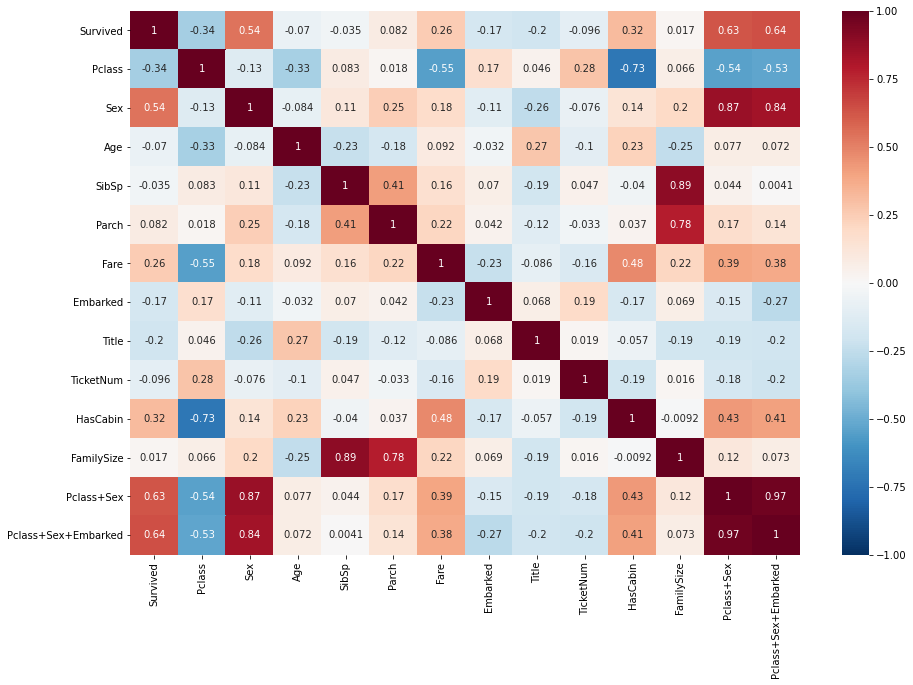

In [208]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, vmin=-1, cmap="RdBu_r")

## Modeling
### ML approach

In [209]:
model_list = [('LR', LogisticRegression()),
              ('LDA', LinearDiscriminantAnalysis()),
              ('KNN', KNeighborsClassifier()),
              ('NB', GaussianNB()),
              ('SVC', SVC()), 
              ('CART', DecisionTreeClassifier()),
              ## Boosting
              ('AB', AdaBoostClassifier()), 
              ('GB', GradientBoostingClassifier()), 
              ## Bagging
              ('RF', RandomForestClassifier()), 
              ('ET', ExtraTreesClassifier())]

for name, model in model_list:
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, train.drop(columns='Survived'), train.Survived, cv=cv, scoring='accuracy')
    print("%s:\tacc=%.6f" % (name, -1.0 * np.mean(scores)))

LR:	acc=-0.626317
LDA:	acc=-0.817041
KNN:	acc=-0.704844
NB:	acc=-0.667865
SVC:	acc=-0.616167
CART:	acc=-0.780012
AB:	acc=-0.838365
GB:	acc=-0.850712
RF:	acc=-0.829426
ET:	acc=-0.806954


In [210]:
model_list = [('LR', LogisticRegression()),
              ('LDA', LinearDiscriminantAnalysis()),
              ('KNN', KNeighborsClassifier()),
              ('NB', GaussianNB()),
              ('SVC', SVC()), 
              ('CART', DecisionTreeClassifier()),
              ## Boosting
              ('AB', AdaBoostClassifier()), 
              ('GB', GradientBoostingClassifier()), 
              ## Bagging
              ('RF', RandomForestClassifier()), 
              ('ET', ExtraTreesClassifier())]

for name, model in model_list:
    scaled_model = Pipeline([("Scaler", StandardScaler()), (name, model)])
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, train.drop(columns='Survived'), train.Survived, cv=cv, scoring='accuracy')
    print("%s:\tacc=%.6f" % ("scaled_"+name, -1.0 * np.mean(scores)))

scaled_LR:	acc=-0.626317
scaled_LDA:	acc=-0.817041
scaled_KNN:	acc=-0.704844
scaled_NB:	acc=-0.667865
scaled_SVC:	acc=-0.616167
scaled_CART:	acc=-0.773321
scaled_AB:	acc=-0.838365
scaled_GB:	acc=-0.849588
scaled_RF:	acc=-0.832772
scaled_ET:	acc=-0.809201


In [164]:
# scaledX = StandardScaler().fit_transform(train.drop(columns='Survived'))
grid_search = dict(n_estimators=[100, 150, 200],
                    criterion=['friedman_mse', 'mse'],
                    loss=['deviance'])
cv = StratifiedKFold(n_splits=10)
grid = GridSearchCV(estimator=GradientBoostingClassifier(), \
                    param_grid=grid_search, scoring='accuracy', cv=cv)
# grid_result = grid.fit(scaledX, train.Survived)
grid_result = grid.fit(train.drop(columns='Survived'), train.Survived)

print(grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(mean, stdev, param)

0.8529588014981273 {'criterion': 'mse', 'loss': 'deviance', 'n_estimators': 100}
0.8507116104868914 0.03596605636972009 {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 100}
0.8484644194756553 0.03907076181409503 {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 150}
0.8439825218476903 0.03574001313717293 {'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 200}
0.8529588014981273 0.03846724568314366 {'criterion': 'mse', 'loss': 'deviance', 'n_estimators': 100}
0.8473408239700374 0.03672673766166294 {'criterion': 'mse', 'loss': 'deviance', 'n_estimators': 150}
0.8428589263420724 0.03798810880243835 {'criterion': 'mse', 'loss': 'deviance', 'n_estimators': 200}


In [165]:
# scaledX = StandardScaler().fit_transform(train.drop(columns='Survived'))
grid_search = dict(n_estimators=[200, 300, 350, 400],
                    criterion=["gini"],
                    max_depth=[None, 15])
cv = StratifiedKFold(n_splits=10)
grid = GridSearchCV(estimator=RandomForestClassifier(), \
                    param_grid=grid_search, scoring='accuracy', cv=cv)
# grid_result = grid.fit(scaledX, train.Survived)
grid_result = grid.fit(train.drop(columns='Survived'), train.Survived)

print(grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(mean, stdev, param)

0.840649188514357 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}
0.8339076154806492 0.04038724584929911 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
0.8294257178526842 0.03809504308869716 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
0.832796504369538 0.0411516417191589 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 350}
0.832796504369538 0.038619462949953526 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 400}
0.8361423220973784 0.03992981891916923 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
0.840649188514357 0.042189244931450584 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}
0.836154806491885 0.03858543228645453 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 350}
0.8327840199750313 0.04388317767476118 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 400}


In [166]:
best_model = GradientBoostingClassifier(n_estimators=100, criterion='mse', loss='deviance')
best_model.fit(train.drop(columns='Survived'), train.Survived)
if hasattr(best_model, 'feature_importances_'):
    print("Feature Importances:")
    feature_importance = best_model.feature_importances_
    index = train.drop(columns='Survived').columns
    for i in range(len(feature_importance)):
        print("%s\t%.6f" % (index[i], feature_importance[i]))
    print()

Feature Importances:
Pclass	0.003423
Sex	0.002085
Age	0.108440
SibSp	0.024251
Parch	0.001182
Fare	0.050888
Embarked	0.000305
Title	0.022211
TicketNum	0.139614
HasCabin	0.019113
FamilySize	0.021093
Pclass+Sex	0.012110
Pclass+Sex+Embarked	0.595285



### DNN approach

Train on 801 samples, validate on 90 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.49902, saving model to weights-improvement.01-0.499.hdf5
801/801 - 1s - loss: 0.6265 - accuracy: 0.6904 - val_loss: 0.4990 - val_accuracy: 0.8556
Epoch 2/100

Epoch 00002: val_loss improved from 0.49902 to 0.39568, saving model to weights-improvement.02-0.396.hdf5
801/801 - 0s - loss: 0.4777 - accuracy: 0.8127 - val_loss: 0.3957 - val_accuracy: 0.9000
Epoch 3/100

Epoch 00003: val_loss improved from 0.39568 to 0.36562, saving model to weights-improvement.03-0.366.hdf5
801/801 - 0s - loss: 0.4234 - accuracy: 0.8277 - val_loss: 0.3656 - val_accuracy: 0.8778
Epoch 4/100

Epoch 00004: val_loss improved from 0.36562 to 0.36182, saving model to weights-improvement.04-0.362.hdf5
801/801 - 0s - loss: 0.4119 - accuracy: 0.8252 - val_loss: 0.3618 - val_accuracy: 0.8889
Epoch 5/100

Epoch 00005: val_loss improved from 0.36182 to 0.35561, saving model to weights-improvement.05-0.356.hdf5
801/801 


Epoch 00050: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3349 - accuracy: 0.8639 - val_loss: 0.3715 - val_accuracy: 0.8667
Epoch 51/100

Epoch 00051: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3323 - accuracy: 0.8652 - val_loss: 0.3646 - val_accuracy: 0.8556
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3325 - accuracy: 0.8639 - val_loss: 0.3685 - val_accuracy: 0.8556
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3295 - accuracy: 0.8677 - val_loss: 0.3712 - val_accuracy: 0.8556
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3308 - accuracy: 0.8627 - val_loss: 0.3669 - val_accuracy: 0.8444
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3320 - accuracy: 0.8652 - val_loss: 0.3740 - val_accuracy: 0.8556
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.33638
801/801 - 0s - loss: 0.3

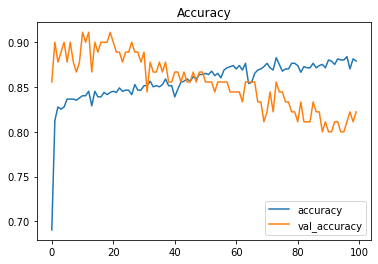

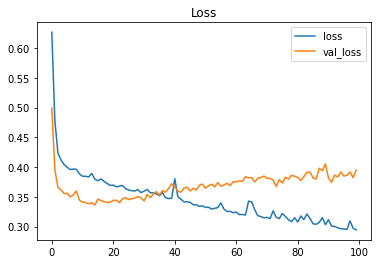

In [161]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))
weightpath = "weights-improvement.{epoch:02d}-{val_loss:.3f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(weightpath, 
                                                monitor='val_loss', 
                                                verbose=True, 
                                                save_best_only=True, 
                                                mode='auto')
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(scaledX, train.Survived.values, validation_split=0.1, epochs=100, callbacks=[checkpoint], verbose=2)

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['accuracy', 'val_accuracy'])

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(['loss', 'val_loss'])

plt.show()